In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('exam_result')
df.head()

,a,b,c
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.shape

(100, 3)

In [5]:
df.describe(include='all')

,c1,c2,res
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
c1     100 non-null float64
c2     100 non-null float64
res    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [7]:
df.corr()

,c1,c2,res
c1,1.000000,-0.023665,0.574057
c2,-0.023665,1.000000,0.512323
res,0.574057,0.512323,1.000000


In [10]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

(70, 2)

In [48]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (70, 2)
y.shape: (70,)
m: 70
n: 2
x.shape after appending a column for bias: (70, 3)


In [49]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[-1.1068358 ],
        [ 0.51214143],
        [-0.60451956]]), (3, 1))

In [50]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [51]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.1102803600828095

In [52]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.000001):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2)
    #print(J)
    log = np.append(log, J)
    iterations+=1

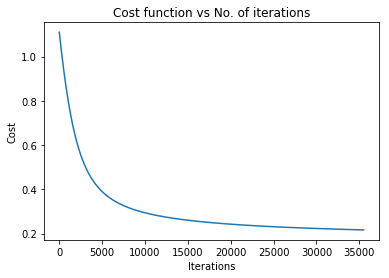

In [53]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [54]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.21661980534775013


In [55]:
iterations

35514

In [56]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

27

In [57]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

90.0

# Using Regularisation

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [87]:
df = pd.read_csv('exam_result')
df.head()

,a,b,c
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [88]:
df.columns = ['c1', 'c2','res']
df.head()

,c1,c2,res
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [89]:
x = df[['c1','c2']] 
x = (x-x.mean())/x.std()
y = df['res']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x = X_train
y = y_train

In [90]:
#Normalisation
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
lamda = 25
print("m: " + str(m))
print("n: " + str(n))
t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (70, 2)
y.shape: (70,)
m: 70
n: 2
x.shape after appending a column for bias: (70, 3)


In [91]:
w = np.random.randn(n+1,1)
w,w.shape

(array([[-2.54872704],
        [ 0.43765779],
        [-0.7073859 ]]), (3, 1))

In [92]:
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))

In [93]:
z = np.matmul(x,w)
#h2 = np.dot(x,w.T)
w1 = np.log(1/(1 + np.exp(-z)))
w2 = np.log(1-(1/(1 + np.exp(-z))))
#J = (-1)*(1/m)*np.sum(  y*(np.log(w1)) + (1-y)*(log(w2))  )
#w3 = w1
#w4 = w2
w1 = y*w1
w2 = (1-y)*w2
w5 = w1+w2
w6 = np.sum(w5)
w6 = -1*(1/m)*w6
j = w6
j

1.7480497804191102

In [94]:
alpha = 0.001 # Learning rate
temp = np.zeros((n+1,1))
J_prev = 100
J=0
iterations = 0
t = 10000
log = np.array([])
while(abs(J_prev-J) > 0.00):
    z = np.matmul(x,w)
    h = 1/(1 + np.exp(-z))
    for i in range(n+1):
        temp[i] = w[i,:] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0)) - alpha*lamda*(1/m)*w[i,:]
    for i in range(n+1):
        w[i,:] = temp[i]
    #print(w)
    #print(np.matmul(h-y,(h-y).T))
    J_prev = J
    w1 = np.log(1/(1 + np.exp(-z)))
    w2 = np.log(1-(1/(1 + np.exp(-z))))
    J = (-1/m)*np.sum(y*w1 + (1-y)*w2) + (1/(2*m))*lamda*np.sum(np.multiply(w,w))
    #print(J)
    log = np.append(log, J)
    iterations+=1

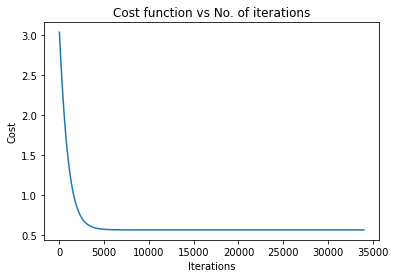

In [95]:
it = np.arange(iterations)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [96]:
print("Minimum Loss: " + str(log.min()))

Minimum Loss: 0.5688593716078856


In [97]:
iterations

34002

In [98]:
y_test = np.array(y_test)
y_test = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((X_test.shape[0],1))
X_test = np.hstack((t,X_test))
z = np.matmul(X_test,w)
y_pred = 1/(1 + np.exp(-z))
i=0
cnt=0
for i in range(X_test.shape[0]):
    if( abs(y_pred[i] - y_test[i]) < 0.5):
        cnt = cnt+1
cnt

28

In [99]:
accuracy = (cnt/y_test.shape[0])*100
accuracy

93.33333333333333